In [31]:
'''Student Name: Jiajun Yang
  Student ID: 1010128862
  Instructor Name: Prof. Shion Guha
  Course Code: INF2178
  Course Name: Experimental Design for Data Science
  Faculty: Faculty of Information
'''

'Student Name: Jiajun Yang\n  Student ID: 1010128862\n  Instructor Name: Prof. Shion Guha\n  Course Code: INF2178\n  Course Name: Experimental Design for Data Science\n  Faculty: Faculty of Information\n'

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat
import math

# Data loading


In [33]:
# load dataset and display
dataset = pd.read_excel("/content/INF2178_A2_data.xlsx")
dataset.head(10)

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y
5,6,1021,Centennial College Progress Campus Child Care ...,Non Profit Agency,941 PROGRESS AVE,M1G 3T8,24,Community College/University,Centennial College Of Applied Arts & Technology,10,20,32,0,0,62,Y,Y
6,7,1029,Air-O-Down Child Care Centre,Non Profit Agency,7 HAWKSDALE RD,M3K 1W3,6,Public High School,Downsview Secondary School,10,15,24,0,0,49,Y,Y
7,8,1031,Cedarbrae Day Nurseries (20 Greencrest),Commercial Agency,20 GREENCREST CIRCT,M1G 1B8,24,High Rise Apartment,Greencrest Property,0,0,16,0,30,46,Y,Y
8,9,1037,Tiago Avenue Community Child Care,Non Profit Agency,145 TIAGO AVE,M4B 2A6,19,Public Elementary School,Victoria Park Public School,0,0,21,0,30,51,Y,Y
9,10,1041,Ledbury Park Child Care Program,Non Profit Agency,95 FALKIRK ST,M5M 4K1,8,Public Elementary School,Ledbury Park Public School,0,0,24,39,90,153,Y,Y


In [34]:
# Display basic information about the dataset
dataset.info()
print()
# find missing data
missing = dataset.isnull().sum()
print(missing)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _id          1063 non-null   int64 
 1   LOC_ID       1063 non-null   int64 
 2   LOC_NAME     1063 non-null   object
 3   AUSPICE      1063 non-null   object
 4   ADDRESS      1063 non-null   object
 5   PCODE        1063 non-null   object
 6   ward         1063 non-null   int64 
 7   bldg_type    1063 non-null   object
 8   BLDGNAME     715 non-null    object
 9   IGSPACE      1063 non-null   int64 
 10  TGSPACE      1063 non-null   int64 
 11  PGSPACE      1063 non-null   int64 
 12  KGSPACE      1063 non-null   int64 
 13  SGSPACE      1063 non-null   int64 
 14  TOTSPACE     1063 non-null   int64 
 15  subsidy      1063 non-null   object
 16  cwelcc_flag  1063 non-null   object
dtypes: int64(9), object(8)
memory usage: 141.3+ KB

_id              0
LOC_ID           0
LOC_NAME         0
AUSP

# Dada Cleaning and Data Wrangling

In [35]:
# Preserve the data that is required to be used
dataset = dataset[['AUSPICE','TOTSPACE','cwelcc_flag']]
data = dataset
data

,AUSPICE,TOTSPACE,cwelcc_flag
0,Non Profit Agency,164,Y
1,Non Profit Agency,83,Y
2,Non Profit Agency,102,Y
3,Non Profit Agency,65,Y
4,Non Profit Agency,26,Y
...,...,...,...
1058,Non Profit Agency,112,Y
1059,Non Profit Agency,60,N
1060,Non Profit Agency,49,N
1061,Non Profit Agency,56,Y


# Exploratory Data Analysis

In [36]:
# Display summary statistics
data.describe()

,TOTSPACE
count,1063.000000
mean,75.674506
std,47.816518
min,6.000000
25%,43.000000
50%,62.000000
75%,97.000000
max,402.000000


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 49.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 27.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 39.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 17.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 16.8% of the points cannot be plac

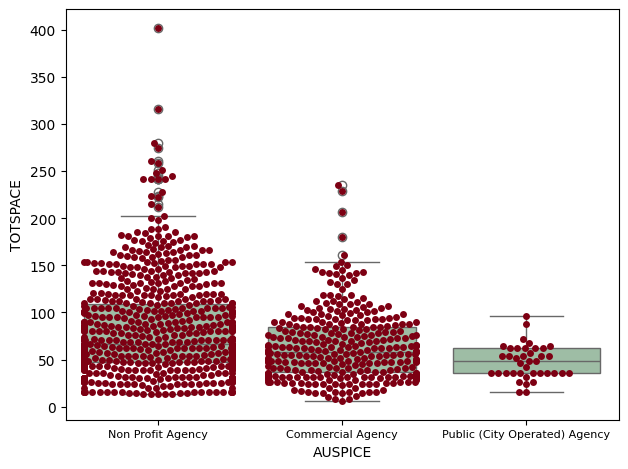

In [37]:
ax = sns.boxplot(x='AUSPICE', y='TOTSPACE', data=data, color='#99c2a2')
ax = sns.swarmplot(x='AUSPICE', y='TOTSPACE', data=data, color='#7d0013')
plt.xticks(fontsize=8)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


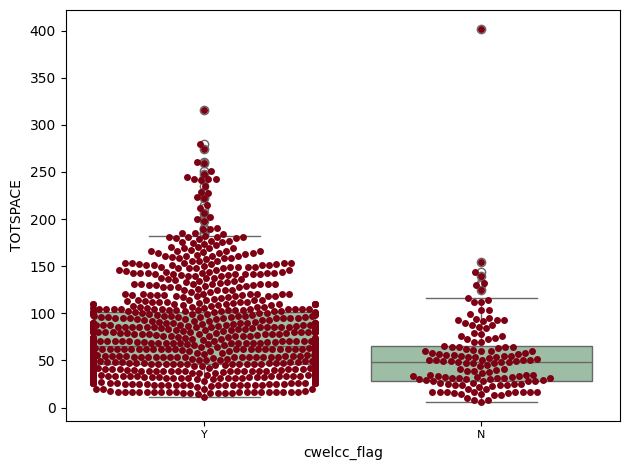

In [38]:
ax = sns.boxplot(x='cwelcc_flag', y='TOTSPACE', data=data, color='#99c2a2')
ax = sns.swarmplot(x='cwelcc_flag', y='TOTSPACE', data=data, color='#7d0013')
plt.xticks(fontsize=8)
plt.tight_layout()
plt.show()

## One way ANOVA Analysis

In [39]:
# Ordinary Least Squares (OLS) model
model = ols('TOTSPACE ~ C(AUSPICE)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# ANOVA table
res = stat()
res.anova_stat(df=data, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,9.611211e+04,48056.057145,21.843051,5.057716e-10
Residual,1060.0,2.332065e+06,2200.061571,NaN,NaN


In [40]:
#post hoc test using Scheffe's test or Tukey's HSD
res = stat()
res.tukey_hsd(df=data, res_var='TOTSPACE', xfac_var='AUSPICE', anova_model='TOTSPACE ~ C(AUSPICE)')
tukey_summary = res.tukey_summary

#assume the sigificant level is 0.05
alpha = 0.05
tukey_summary['reject'] = tukey_summary['p-value'] < alpha
tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value,reject
0,Non Profit Agency,Commercial Agency,17.119417,9.703599,24.535235,7.662434,0.001000,True
1,Non Profit Agency,Public (City Operated) Agency,34.334610,16.224077,52.445142,6.292710,0.001000,True
2,Commercial Agency,Public (City Operated) Agency,17.215193,-1.453146,35.883531,3.060857,0.077966,False


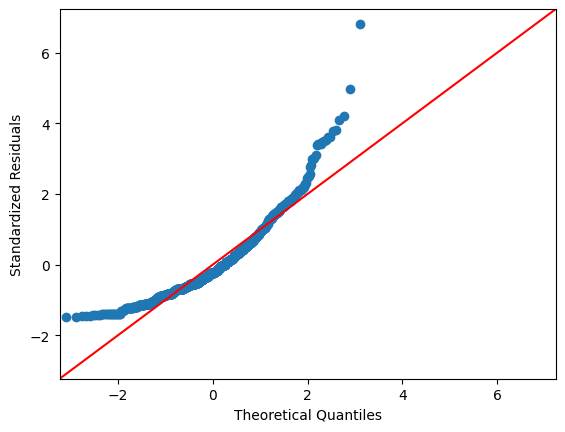

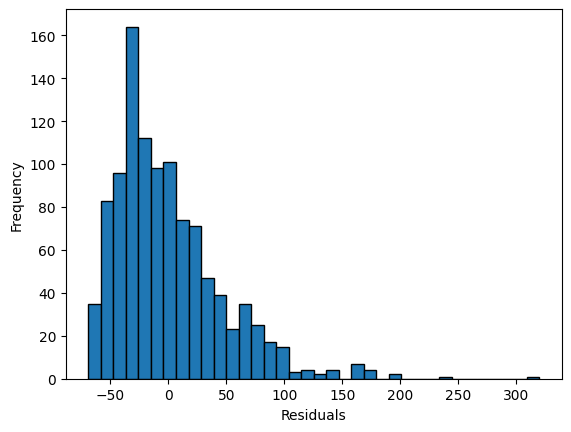

In [41]:
# boxplot
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [42]:
#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

if pvalue < 0.05:
    print("The data does not follow a normal distribution.")
else:
    print("The data follows a normal distribution.")

0.901775598526001 1.4964898448030214e-25
The data does not follow a normal distribution.


In [43]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=data, res_var='TOTSPACE', xfac_var='AUSPICE')
res.levene_summary

,Parameter,Value
0,Test statistics (W),17.9271
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


## Two way ANOVA Analysis

In [44]:
# Preserve the data that is required to be used
data2 = dataset
data2

,AUSPICE,TOTSPACE,cwelcc_flag
0,Non Profit Agency,164,Y
1,Non Profit Agency,83,Y
2,Non Profit Agency,102,Y
3,Non Profit Agency,65,Y
4,Non Profit Agency,26,Y
...,...,...,...
1058,Non Profit Agency,112,Y
1059,Non Profit Agency,60,N
1060,Non Profit Agency,49,N
1061,Non Profit Agency,56,Y


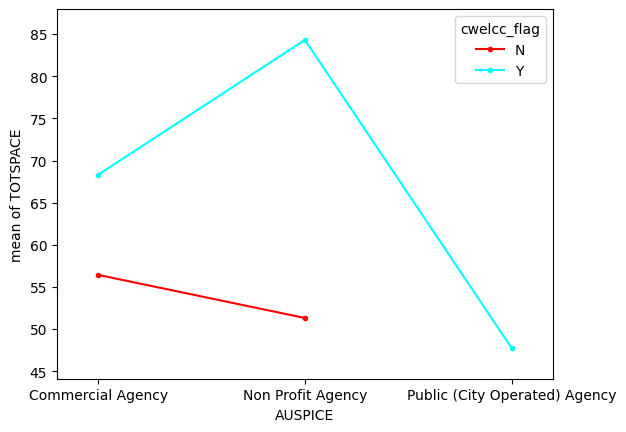

AUSPICE                        cwelcc_flag
Commercial Agency              N               90
                               Y              231
Non Profit Agency              N               47
                               Y              656
Public (City Operated) Agency  Y               39
dtype: int64


In [45]:
# generate interaction plot
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=data2['AUSPICE'],trace=data2['cwelcc_flag'],response=data2['TOTSPACE'])
plt.show()
print(data2.groupby(['AUSPICE', 'cwelcc_flag']).size())

In [46]:
# Ordinary Least Squares (OLS) model
model = ols('TOTSPACE ~ C(cwelcc_flag) + C(AUSPICE) + C(cwelcc_flag):C(AUSPICE)', data=data2).fit()

# ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(cwelcc_flag),3.768832e+04,1.0,17.525698,0.000031
C(AUSPICE),5.416741e+04,2.0,12.594373,0.000004
C(cwelcc_flag):C(AUSPICE),2.949561e+04,2.0,6.857975,0.001098
Residual,2.275187e+06,1058.0,NaN,NaN


In [47]:
#post hoc test using Scheffe's test or Tukey's HSD
res = stat()
res.anova_stat(df=data2, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(cwelcc_flag) + C(AUSPICE) + C(cwelcc_flag):C(AUSPICE)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(cwelcc_flag),1.0,3.768832e+04,37688.323276,17.525698,0.000031
C(AUSPICE),2.0,5.416741e+04,27083.703105,12.594373,0.000004
C(cwelcc_flag):C(AUSPICE),2.0,2.949561e+04,14747.806131,6.857975,0.001098
Residual,1058.0,2.275187e+06,2150.460631,NaN,NaN


In [48]:
res.tukey_hsd(df=data2, res_var='TOTSPACE',xfac_var='cwelcc_flag', anova_model='TOTSPACE ~ C(cwelcc_flag) + C(AUSPICE) + C(cwelcc_flag):C(AUSPICE)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Y,N,24.101945,15.772582,32.431309,8.029722,0.001


In [49]:
res.tukey_hsd(df=data2, res_var='TOTSPACE',xfac_var='AUSPICE', anova_model='TOTSPACE ~ C(cwelcc_flag) + C(AUSPICE) + C(cwelcc_flag):C(AUSPICE)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,17.119417,9.787652,24.451182,7.750298,0.001000
1,Non Profit Agency,Public (City Operated) Agency,34.334610,16.429346,52.239874,6.364868,0.001000
2,Commercial Agency,Public (City Operated) Agency,17.215193,-1.241554,35.671940,3.095956,0.073556


In [50]:
res.tukey_hsd(df=data2, res_var='TOTSPACE',xfac_var=['cwelcc_flag','AUSPICE'], anova_model='TOTSPACE ~ C(cwelcc_flag) + C(AUSPICE) + C(cwelcc_flag):C(AUSPICE)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Y, Non Profit Agency)","(Y, Commercial Agency)",15.993434,5.864514,26.122354,6.375101,0.001000
1,"(Y, Non Profit Agency)","(Y, Public (City Operated) Agency)",36.540220,14.719584,58.360857,6.761020,0.001000
2,"(Y, Non Profit Agency)","(N, Non Profit Agency)",32.990302,12.999232,52.981373,6.662830,0.001000
3,"(Y, Non Profit Agency)","(N, Commercial Agency)",27.876118,12.994318,42.757918,7.562847,0.001000
4,"(Y, Non Profit Agency)","(N, Public (City Operated) Agency)",0.000000,-inf,inf,0.000000,0.900000
5,"(Y, Commercial Agency)","(Y, Public (City Operated) Agency)",20.546787,-2.372591,43.466164,3.619508,0.108474
6,"(Y, Commercial Agency)","(N, Non Profit Agency)",16.996868,-4.188046,38.181783,3.239296,0.198646
7,"(Y, Commercial Agency)","(N, Commercial Agency)",11.882684,-4.568021,28.333389,2.916342,0.308164
8,"(Y, Commercial Agency)","(N, Public (City Operated) Agency)",0.000000,-inf,inf,0.000000,0.900000
9,"(Y, Public (City Operated) Agency)","(N, Non Profit Agency)",3.549918,-25.126653,32.226490,0.499804,0.900000


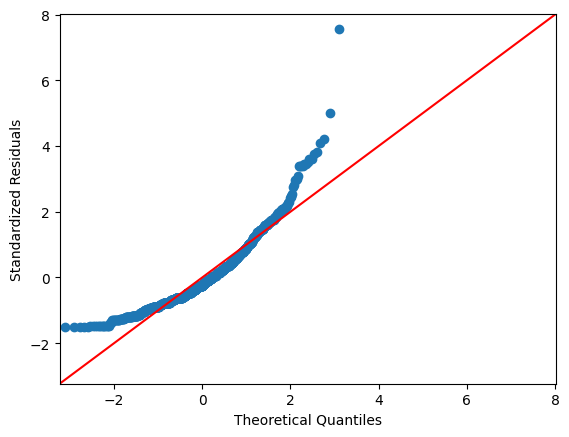

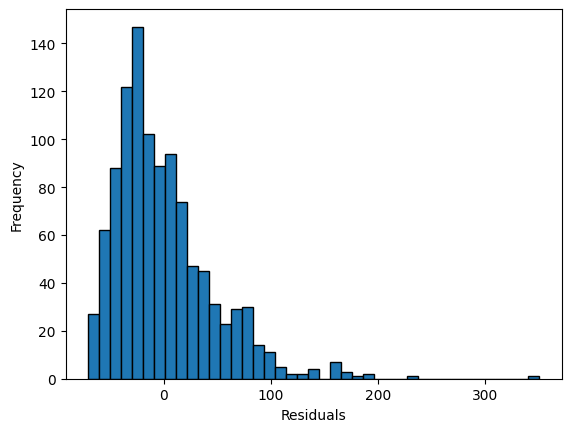

In [51]:
# testing ANOVA assumptions

# assumption 1: residuals follow a normal distribution (using qq plot and histogram)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [52]:
# testing assumption 1 using Shapiro-Wilk Test
w, pvalue = stats.shapiro(res.anova_model_out.resid)
print(w,pvalue)
if pvalue < 0.05:
    print("The data does not follow a normal distribution.")
else:
    print("The data follows a normal distribution.")


0.8972285389900208 4.5834627426744554e-26
The data does not follow a normal distribution.


In [53]:
# assumption 2: samples are of equal variance (using Levene's Test)
res = stat()
res.levene(df=data2, res_var='TOTSPACE', xfac_var=['AUSPICE','cwelcc_flag'])
res.levene_summary


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,Parameter,Value
0,Test statistics (W),NaN
1,Degrees of freedom (Df),5.0
2,p value,NaN
